In [31]:
import pickle
import pandas as pd
import numpy as np

In [32]:
with open("../pickle_files/classification_model.pkl","rb") as f:
    model = pickle.load(f)


In [33]:
df = pd.read_csv("../data/vectors_and_result.csv")

In [34]:
def parse_vector(vec_str):
    cleaned = vec_str.strip('[]').split()
    return np.array([float(x) for x in cleaned])

In [35]:
df['vectors'] = df['vectors'].apply(parse_vector)

In [36]:
df['result_Encoded'].value_counts()

result_Encoded
1    80888
4    80888
5    80888
7    80888
2    80888
6    80888
3    80888
0    80888
Name: count, dtype: int64

In [37]:
df_sampled = (
    df.groupby("result_Encoded")
      .sample(n=4000, random_state=42)
      .reset_index(drop=True)
)

X = np.vstack(df_sampled["vectors"].values)
Y = df_sampled["result_Encoded"].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [40]:
preds = model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [42]:
cm = confusion_matrix(Y_test , preds)

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

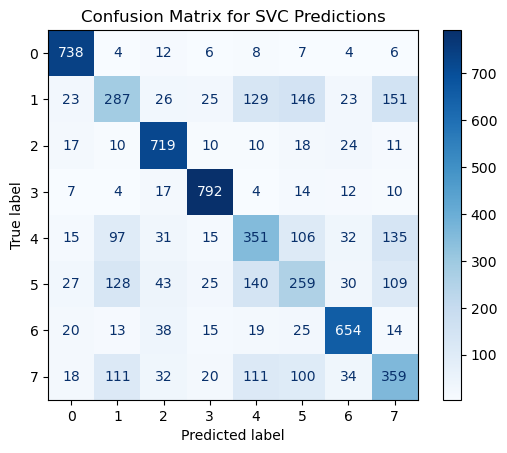

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVC Predictions")
plt.show()

In [45]:
precision = precision_score(Y_test,preds,average='weighted')
recall = recall_score(Y_test,preds,average='weighted')
f1 = f1_score(Y_test,preds,average='weighted')

In [46]:
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")

precision : 0.6344938015544489
recall : 0.64984375
f1 : 0.6407385787379425
